In [136]:
from epyt import epanet

In [137]:
d = epanet("../networks/BUILDING.inp")

EPANET version 20200 loaded (EPyT version 1.0.1).
Input File BUILDING.inp loaded successfully.



In [138]:
d.setTimeSimulationDuration(172800)

In [139]:
d.deleteControls()
tankID = 'T1'
pumpID = 'PUMP'

tankIndex = d.getNodeIndex(tankID)
pumpIndex = d.getLinkIndex(pumpID)
tankElevation = d.getNodeElevations(tankIndex)

# Hydraulic analysis STEP-BY-STEP.
d.openHydraulicAnalysis()
d.initializeHydraulicAnalysis(0)

tstep = 1
i = 0
T, P, F, S = [], [], [], []

# CONTROLS.
Below = 1.0
Above = 2.0
tankHead = []
while tstep > 0:

    H = d.getNodeHydraulicHead()
    tankHead.append(H[tankIndex - 1] - tankElevation)

    # Add new controls in live.
    # LINK 9 OPEN IF NODE 2 BELOW 110
    # if tankHead[i] < Below:
    #     d.setLinkStatus(pumpIndex, 1)
    # # LINK 9 CLOSED IF NODE 2 ABOVE 140
    # if tankHead[i] > Above:
    #     d.setLinkStatus(pumpIndex, 0)
    i += 1

    t = d.runHydraulicAnalysis()

    S.append(d.getLinkStatus(pumpIndex))
    F.append(d.getLinkFlows())
    P.append(d.getNodePressure())
    T.append(t)

    tstep = d.nextHydraulicAnalysisStep()

d.closeHydraulicAnalysis()
print("Hydraulic Analysis completed succesfully.")

Hydraulic Analysis completed succesfully.


In [140]:
len(F)

50

/opt/homebrew/Caskroom/mambaforge/base/envs/engineering-smart-cities/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


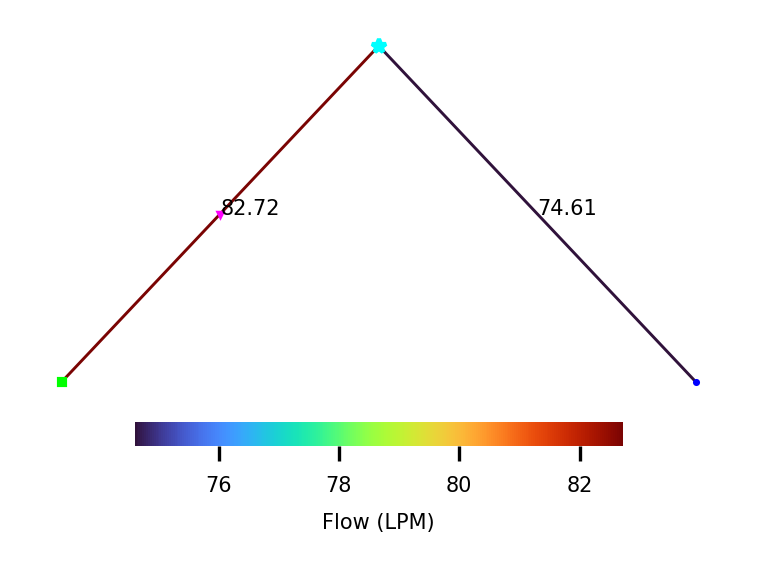

In [141]:
_ = d.plot(flow=F[48], flow_text=True)

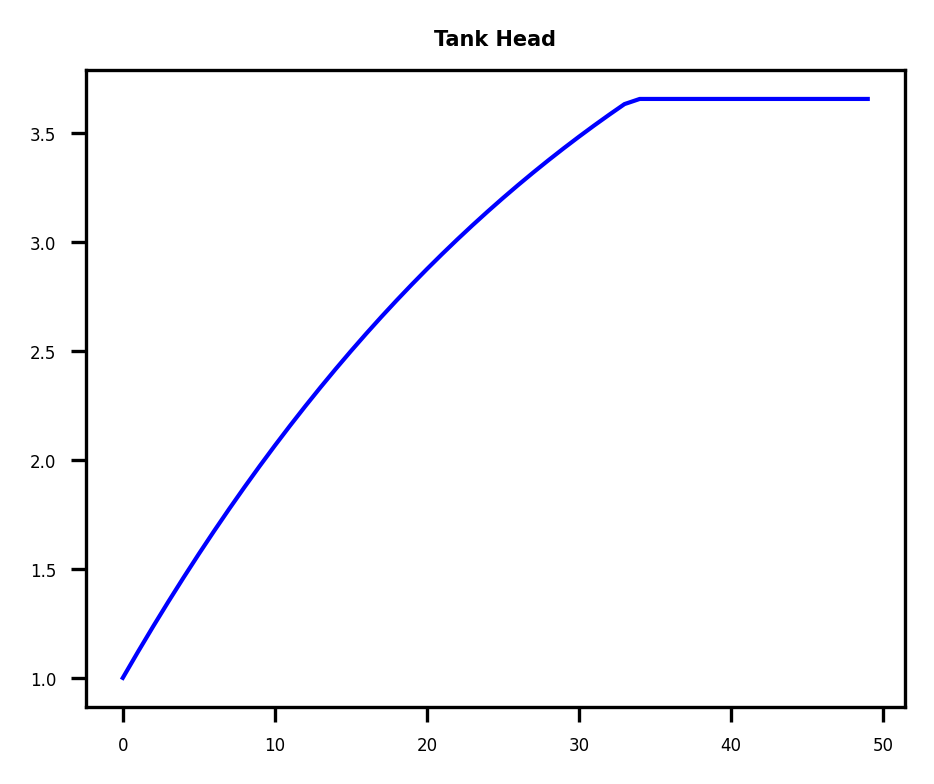

In [142]:
d.plot_ts(Y=tankHead, title='Tank Head', marker=False)